In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Let us first read our data and try to analyse it

In [2]:
df = pd.read_csv("../input/car data.csv", )
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### On looking at the data we need to question ourself as to how we can explore this data. Lets start by analyzing every column individually

#### On looking at the data it is noted that we have both the present price and the selling price of the car. Although their might be a difference in purhcase prices depending upon which year the car was purchased, howevere that can be neglibible as no extreme variation is ever seen in car purchase price.

### Now lets create a seprate column giving us the depreciation of each car and add the column to our main data frame

In [3]:
car_depreciation = df['Present_Price'] - df['Selling_Price']
df['depreciation'] = car_depreciation
car_depreciation

0      2.24
1      4.79
2      2.60
3      1.30
4      2.27
5      0.58
6      1.37
7      2.11
8      0.14
9      1.47
10     0.75
11     3.53
12     2.44
13     1.61
14     4.96
15     3.04
16     3.54
17     3.04
18     1.84
19     5.33
20     1.10
21     0.81
22     3.61
23     0.96
24     1.51
25     1.99
26     1.72
27     0.49
28     2.00
29     2.93
       ... 
271    7.00
272    2.50
273    5.25
274    1.50
275    2.70
276    4.95
277    3.90
278    2.40
279    7.35
280    0.65
281    5.50
282    5.75
283    2.81
284    2.40
285    1.10
286    2.25
287    1.75
288    5.20
289    3.49
290    1.90
291    0.70
292    2.00
293    6.65
294    3.05
295    4.54
296    2.10
297    1.90
298    7.65
299    1.00
300    0.60
Length: 301, dtype: float64

#### Great! Now we know exactly how much depreciation has happened for every car. Also we need to represent this by car's name and not by serial number. So lets make a seprate dataset and include the variables we are going to use to visualise our data which would help us see which car has the best and worst re-sale values

In [4]:
depr = df[['Car_Name', 'depreciation']]
depr.head()

,Car_Name,depreciation
0,ritz,2.24
1,sx4,4.79
2,ciaz,2.60
3,wagon r,1.30
4,swift,2.27


#### Using group by and then sorting it in descending order gives us the car with the maximum depreciation

In [5]:
grouped = depr.groupby('Car_Name').mean()
grouped.sort_values('depreciation', ascending=False)



,depreciation
Car_Name,
land cruiser,57.600000
camry,21.230000
fortuner,12.047273
corolla,10.850000
corolla altis,10.399375
innova,5.068889
sx4,4.908333
city,4.372692
etios cross,3.333333


In [6]:
df['Car_Name'].value_counts().head(30)

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
i20                           9
ciaz                          9
innova                        9
grand i10                     8
jazz                          7
Royal Enfield Classic 350     7
amaze                         7
sx4                           6
ertiga                        6
eon                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
wagon r                       4
dzire                         4
etios liva                    4
Royal Enfield Thunder 350     4
ritz                          4
Yamaha FZ S V 2.0             3
TVS Apache RTR 160            3
Bajaj Pulsar NS 200           3
creta                         3
Honda CB Hornet 160R          3
xcent                         3
Name: Car_Name, dtype: int64

#### We can see that Cars like Land Cruiser, Camry, Corolla does not have much samples hence we would not be discussing them further in detail

#### Lets analyse why other cars have such high depreciation and analyze some cars indvidually

In [7]:
temp = df.loc[df['Car_Name'] == 'fortuner']
temp.head(11)# since fortuner has 11 samples

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0,15.71
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7.61
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0,14.61
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0,15.97
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0,17.21
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0,12.46
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0,3.23
67,fortuner,2010,9.25,20.45,59000,Diesel,Dealer,Manual,0,11.20
79,fortuner,2012,14.50,30.61,89000,Diesel,Dealer,Automatic,0,16.11
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7.61


#### Now lets plot the same on a bar graph using matplotlib which will give us an better understanding of depreciation of fortuner for its make year

Text(0, 0.5, 'Depreciation in lacs')

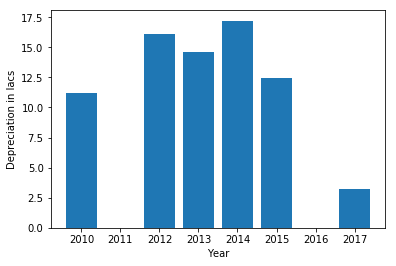

In [8]:
plt.bar(x = temp['Year'], height=temp['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

#### The above bar graph shows us that depreciation of fortuner does not completely depends on its make year

#### Now lets do the same for some other cars

In [9]:
temp_1 = df.loc[df['Car_Name'] == 'city']
temp_1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
251,city,2013,5.00,9.9,56701,Petrol,Dealer,Manual,0,4.90
253,city,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0,2.70
254,city,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0,4.65
256,city,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0,3.35
257,city,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0,5.10


Text(0, 0.5, 'Depreciation in lacs')

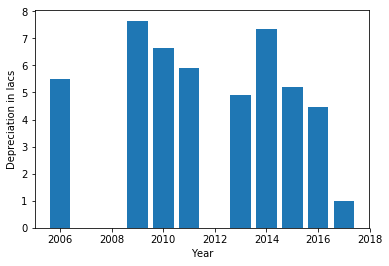

In [10]:
plt.bar(x = temp_1['Year'], height=temp_1['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

#### The above graph gives us an idea about depreciation of city over its make year, which is also not constant

In [11]:
temp_2 = df.loc[df['Car_Name'] == 'corolla altis']
temp_2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
55,corolla altis,2009,3.60,15.04,70000,Petrol,Dealer,Automatic,0,11.44
57,corolla altis,2010,4.75,18.54,50000,Petrol,Dealer,Manual,0,13.79
60,corolla altis,2013,6.95,18.61,40001,Petrol,Dealer,Manual,0,11.66
68,corolla altis,2011,4.35,13.74,88000,Petrol,Dealer,Manual,0,9.39
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0,6.66


Text(0, 0.5, 'Depreciation in lacs')

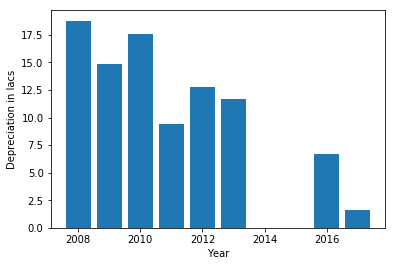

In [12]:
plt.bar(x = temp_2['Year'], height=temp_2['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

In [13]:
temp_3 = df.loc[df['Car_Name'] == 'verna']
temp_3.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
215,verna,2012,4.50,9.4,36100,Petrol,Dealer,Manual,0,4.90
218,verna,2014,6.45,9.4,45078,Petrol,Dealer,Manual,0,2.95
219,verna,2012,4.50,9.4,36000,Petrol,Dealer,Manual,0,4.90
223,verna,2015,8.25,9.4,61381,Diesel,Dealer,Manual,0,1.15
224,verna,2013,5.11,9.4,36198,Petrol,Dealer,Automatic,0,4.29


Text(0, 0.5, 'Depreciation in lacs')

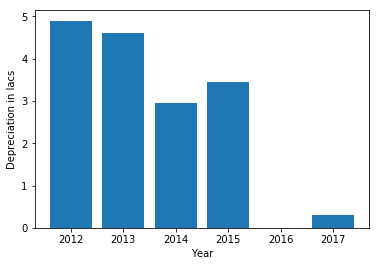

In [14]:
plt.bar(x = temp_3['Year'], height=temp_3['depreciation'])
plt.xlabel('Year')
plt.ylabel('Depreciation in lacs')

#### The bar graph for verna and corolla altis gives us a more constant depreciation than city and fortuner, hence leaves us with a mixed idea of make year being the most important factor in depreciation

### Now let us analyze some more variables

In [15]:
kms = df[['Car_Name', 'Kms_Driven']]
kms.head()

,Car_Name,Kms_Driven
0,ritz,27000
1,sx4,43000
2,ciaz,6900
3,wagon r,5200
4,swift,42450


In [16]:
by_kms_driven = kms.groupby('Car_Name').mean().tail(30)
by_kms_driven.sort_values('Kms_Driven', ascending=False)

,Kms_Driven
Car_Name,
corolla,135154.000000
land cruiser,78000.000000
fortuner,62702.818182
innova,58713.111111
etios cross,54707.333333
corolla altis,54293.875000
dzire,54243.500000
etios liva,51500.000000
sx4,50740.000000


#### Now lets study the bar graphs for depreciation of different cars based on the kilometeres they are driven

In [17]:
temp_4 = df.loc[df['Car_Name'] == 'city']
temp_4.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
251,city,2013,5.00,9.9,56701,Petrol,Dealer,Manual,0,4.90
253,city,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0,2.70
254,city,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0,4.65
256,city,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0,3.35
257,city,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0,5.10


Text(0, 0.5, 'Kms Driven')

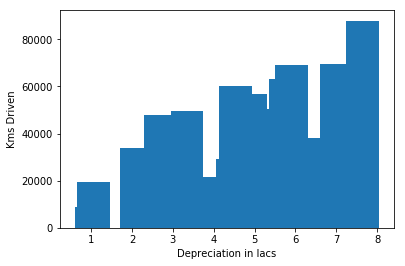

In [18]:
plt.bar(x = temp_4['depreciation'], height=temp_4['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [19]:
temp_5 = df.loc[df['Car_Name'] == 'fortuner']
temp_5.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0,15.71
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7.61
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0,14.61
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0,15.97
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0,17.21


Text(0, 0.5, 'Kms Driven')

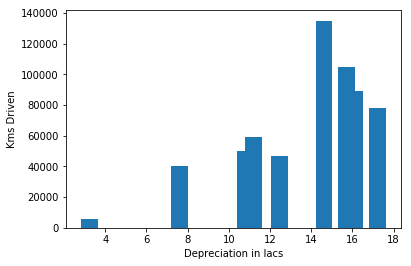

In [20]:
plt.bar(x = temp_5['depreciation'], height=temp_5['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [21]:
temp_6 = df.loc[df['Car_Name'] == 'corolla altis']
temp_6.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
55,corolla altis,2009,3.60,15.04,70000,Petrol,Dealer,Automatic,0,11.44
57,corolla altis,2010,4.75,18.54,50000,Petrol,Dealer,Manual,0,13.79
60,corolla altis,2013,6.95,18.61,40001,Petrol,Dealer,Manual,0,11.66
68,corolla altis,2011,4.35,13.74,88000,Petrol,Dealer,Manual,0,9.39
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0,6.66


Text(0, 0.5, 'Kms Driven')

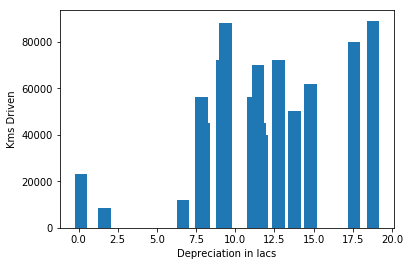

In [22]:
plt.bar(x = temp_6['depreciation'], height=temp_6['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

In [23]:
temp_7 = df.loc[df['Car_Name'] == 'verna']
temp_7.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
215,verna,2012,4.50,9.4,36100,Petrol,Dealer,Manual,0,4.90
218,verna,2014,6.45,9.4,45078,Petrol,Dealer,Manual,0,2.95
219,verna,2012,4.50,9.4,36000,Petrol,Dealer,Manual,0,4.90
223,verna,2015,8.25,9.4,61381,Diesel,Dealer,Manual,0,1.15
224,verna,2013,5.11,9.4,36198,Petrol,Dealer,Automatic,0,4.29


Text(0, 0.5, 'Kms Driven')

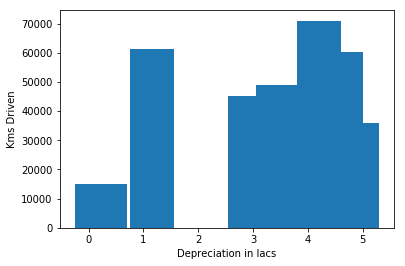

In [24]:
plt.bar(x = temp_7['depreciation'], height=temp_7['Kms_Driven'])
plt.xlabel('Depreciation in lacs')
plt.ylabel('Kms Driven')

#### The above graph shows somewhat constant behaviour for depreciation agaist kms driven, howevere even kms driven cannot be considered as sole factor affecting depreciation

#### for studying other variables we need to transform them to get a better understanding of their importance in depreciation of car

#### Let us now transform our categoricals values into numerical 

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
le.fit(df['Fuel_Type'])

LabelEncoder()

In [28]:
le.classes_

array(['CNG', 'Diesel', 'Petrol'], dtype=object)

In [29]:
df['Fuel_Type'] = le.transform(df['Fuel_Type'])

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,2,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,2,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,2,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0,2.27


In [31]:
le.fit(df['Seller_Type'])

LabelEncoder()

In [32]:
df['Seller_Type'] = le.transform(df['Seller_Type'])

In [33]:
le.classes_

array(['Dealer', 'Individual'], dtype=object)

In [34]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,2,0,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,2,0,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,2,0,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,1,0,Manual,0,2.27


In [35]:
le.fit(df['Transmission'])

LabelEncoder()

In [36]:
df['Transmission'] = le.transform(df['Transmission'])

In [37]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,2,0,1,0,2.24
1,sx4,2013,4.75,9.54,43000,1,0,1,0,4.79
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,2.60
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,1.30
4,swift,2014,4.60,6.87,42450,1,0,1,0,2.27


In [38]:
by_fuel_type = df[['Car_Name', 'Fuel_Type', 'depreciation']]
by_fuel_type.head()

,Car_Name,Fuel_Type,depreciation
0,ritz,2,2.24
1,sx4,1,4.79
2,ciaz,2,2.60
3,wagon r,2,1.30
4,swift,1,2.27


In [39]:
fuel_t = by_fuel_type.groupby('Fuel_Type').mean()

fuel_t.head()

,depreciation
Fuel_Type,
0,3.315000
1,5.536000
2,2.319372


#### The Fuel type '0'is CNG, '1' is diesel and '2' is petrol, hence we know from this that diesel cars have the max depreciation, however this is not concerte as other factors also have an important say than just fuel type

In [40]:
by_seller_t = df[['Car_Name', 'Seller_Type', 'depreciation']]
by_seller_t.head()

,Car_Name,Seller_Type,depreciation
0,ritz,0,2.24
1,sx4,0,4.79
2,ciaz,0,2.60
3,wagon r,0,1.30
4,swift,0,2.27


In [41]:
seller_t = by_seller_t.groupby('Seller_Type').mean()
# by_kms_driven.sort_values('Kms_Driven', ascending=False)
seller_t.head()

,depreciation
Seller_Type,
0,4.164615
1,0.764340


#### From this we know that '0' is automatic and '1' is manual, howevere even this does not helps our purpose of getting accurate relationship.

#### Let us plot some more graphs to get some better insights

#### Let us plot a pair plot to get better understanding of how the variables Kms_Driven and Year affects depreciation, we will be using seaborn for this

In [42]:
new_df = df[['Car_Name', 'Year', 'Kms_Driven', 'depreciation']]
new_df.head()

,Car_Name,Year,Kms_Driven,depreciation
0,ritz,2014,27000,2.24
1,sx4,2013,43000,4.79
2,ciaz,2017,6900,2.60
3,wagon r,2011,5200,1.30
4,swift,2014,42450,2.27


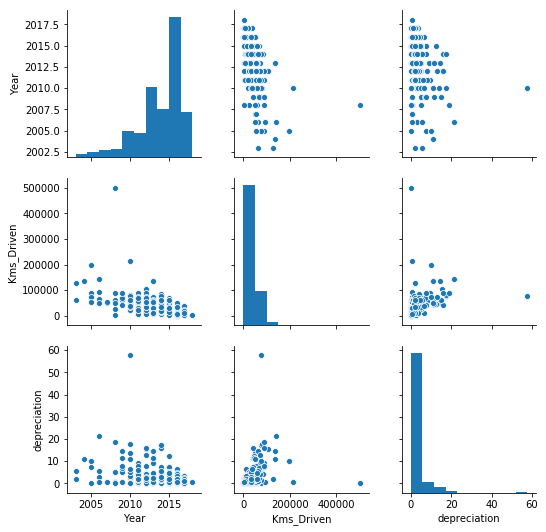

In [43]:
sns.pairplot(new_df)

#### The above graph gives us a more clear picture, we can see from it that both Year and Kms Driven have an important say on depreciation

#### Let us analyze all the values that can have a say on cars depreciation**

In [44]:
final_val = df[['Car_Name', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'depreciation','Year', 'Transmission']]
final_val.head()

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,depreciation,Year,Transmission
0,ritz,27000,2,0,2.24,2014,1
1,sx4,43000,1,0,4.79,2013,1
2,ciaz,6900,2,0,2.60,2017,1
3,wagon r,5200,2,0,1.30,2011,1
4,swift,42450,1,0,2.27,2014,1


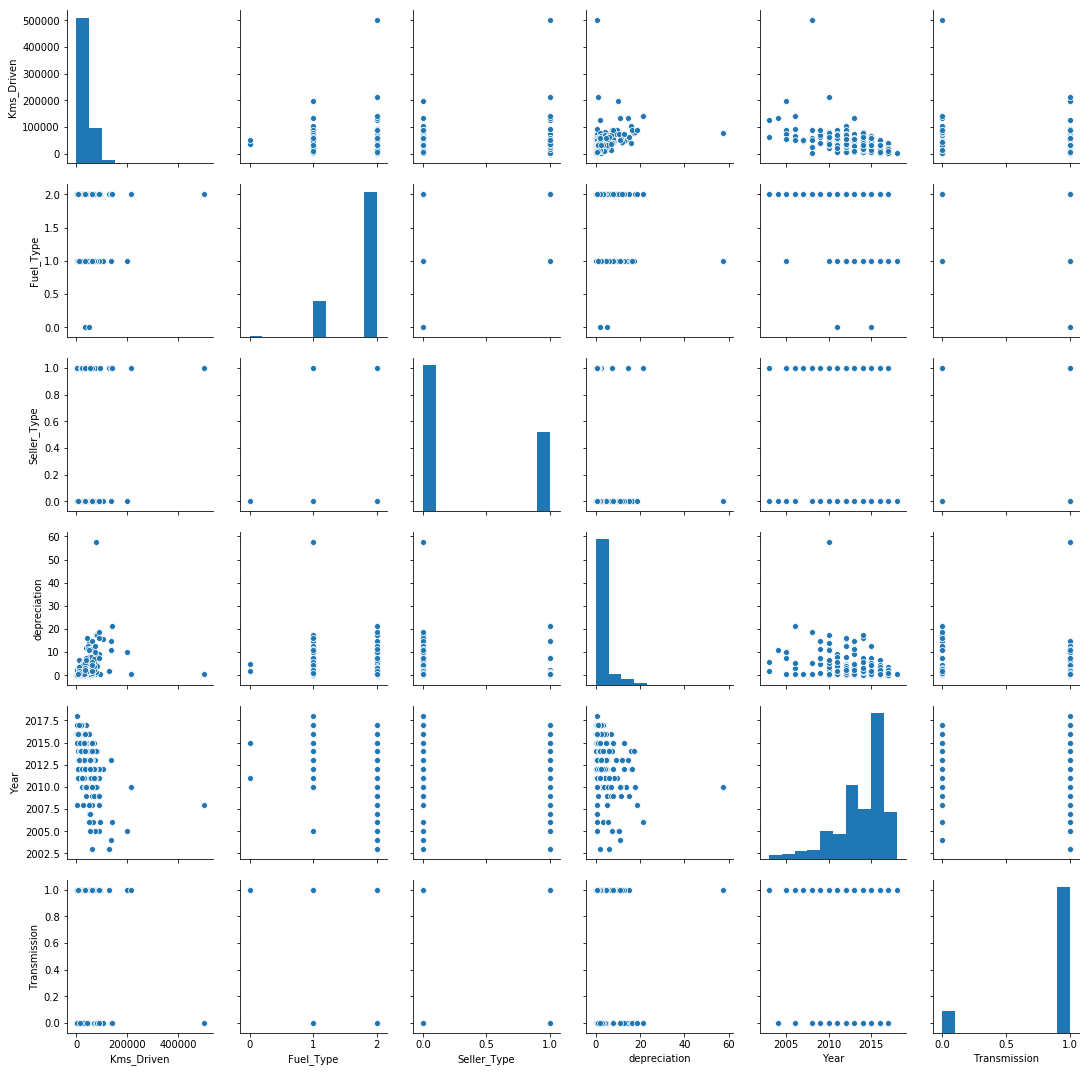

In [45]:
sns.pairplot(final_val)

#### The above graph shows that the variales such as transmission and seller type does not have much impact on depreciation as compared to Kms Driven and Year, hence from this we can conclude that kms driven and year has a bigger impact on depreciation than other factors.